In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#from degree_betweenness import *
import pandas as pd
import networkx.algorithms.community as community3
from networkx.algorithms.community import louvain_partitions
import matplotlib.cm as cm
#import community
import community.community_louvain as community_louvain
from networkx.algorithms.community import girvan_newman
import community as cmm
import copy

In [2]:
path = "./chess_data_2020.csv"
path_to_save = "./nx_saved.jpg"

def clean_dataframe(dataframe): #questa funzione pulisce il df eliminando le colonne inutili e droppa i NaN
  df = pd.read_csv(dataframe)
  new_df = pd.DataFrame(df, columns=['White', 'Black', 'Result', 'Date', 'Opening'])
  new_df.dropna()
  return new_df

def create_network_from_dataframe(df, source, target): #ritorna il network creato partendo da un df pulito
   G = nx.from_pandas_edgelist(df, source, target)
   return G

def draw_and_save_network(G,node_size,with_labels,path_to_save): #visualizza e salva in locale un network, prende G, la node-size e un bool se vogliamo mettere o no i labels e il percorso-nome in cui salvare
   fig = nx.draw(G, node_size=node_size, with_labels = with_labels)
   plt.savefig(path_to_save)


df = clean_dataframe(path)
#print(df)

#bip = create_network_from_dataframe(df, )

def save_first3(dataframe):
    new_name = []
    for i in dataframe["Opening"].values:
        
        new_name.append(str(i)[:3])
    
    dataframe = dataframe.drop("Opening", axis=1)
    dataframe.insert(4, "ECO", new_name, False)
    return dataframe



new_df = save_first3(df)
new_df=new_df.dropna()

list_players_white=new_df['White'].values
list_players_black=new_df['Black'].values
list_players_full=list_players_white+list_players_black
unique_players=[]
for i in list_players_white:
    unique_players.append(i)
for i in list_players_black:
    unique_players.append(i)
unique_players=[*set(unique_players)]

graph = nx.Graph()

# Add nodes from the 'white' and 'black' columns
graph.add_nodes_from(new_df['White'], bipartite=0)
graph.add_nodes_from(new_df['Black'], bipartite=1)

# Add edges connecting 'white' and 'opening' nodes
white_opening_edges = [(row['White'], row['ECO']) for _, row in new_df.iterrows()]
graph.add_edges_from(white_opening_edges)

# Add edges connecting 'black' and 'opening' nodes
black_opening_edges = [(row['Black'], row['ECO']) for _, row in new_df.iterrows()]
graph.add_edges_from(black_opening_edges)

# Project the bipartite graph onto the 'opening' nodes
players_graph = nx.bipartite.weighted_projected_graph(graph, unique_players, ratio=True)
print('players graph created')
#pos = nx.spring_layout(players_graph)
#nx.draw(players_graph, pos, with_labels=unique_players, node_color='lightblue', node_size=50, font_size=2, width=0.1)
#plt.axis('off')
graph_louvain = community3.louvain_communities(players_graph)
partitions = community_louvain.best_partition(players_graph)
print(partitions)


##### QUI STIAMO SALVANDO IN CSV IL DICTONARY CHE HA AD OGNI COMMUNITY, IL O I PLAYERS ASSOCIATI;
### CHE POI MANIPOLEREMO PER CAPIRE QUALI GIOCATORI SONO IN QUALE COMMUNITY
#path2save = '/Users/francescoaldoventurelli/Desktop/codici_CN/'
#name = 'community_players_LOVAIN_dict.csv'
#save_dict = pd.DataFrame.from_dict(partitions, columns=[])
#save_dict.to_csv(path2save+name)

players graph created
{'Romero Araya, D': 0, 'Bitensky, I': 1, 'Fisher, M': 2, 'Fekete, A': 3, 'Silich, Y': 3, 'Medarde Santiago, L': 0, 'Sadzikowski, D': 3, 'Rodriguez Font, R': 4, 'Nyysti, S': 1, 'Makhnev, D': 3, 'Moradiabadi, E': 2, 'Erzhanov, A': 4, 'Roozbayan, R': 1, 'Berdnyk, M': 3, 'Cruz Lledo, P': 4, 'Budisavljevic, L': 4, 'Semenova, E': 3, 'Porta Tovar, G': 1, 'Harutyunyan, T': 3, 'Mikhalevski, V': 0, 'Pablos Tenrero, R': 4, 'Chen, R': 3, 'Shkalov, O': 2, 'Sgircea, S': 2, 'Pinho, P': 2, 'Tejaswini, S': 3, 'Mullick, R': 0, 'Semjonovs, I': 0, 'Portela Peleteiro, A': 4, 'Cuartas, J': 1, 'Mostbauer, F': 1, 'Dominguez Perez, L': 3, 'Jordao Barbosa, M': 3, 'Srihari, L': 1, 'Pantovic, D': 3, 'Guerra Reig, J': 4, 'Abdusattorov, N': 0, 'Dzhumaev, M': 4, 'Ivanisevic, I': 4, 'Sargsyan, S': 3, 'Kopriva, M': 4, 'Nikolov, M': 4, 'Bressy, T': 4, 'Jansen, G': 3, 'Wang, A': 3, 'Goldin, A': 3, 'Bykhovsky, A': 3, 'Valeanu, E': 0, 'Saveliev, A': 4, 'Moiseenko, A': 3, 'Steffens, O': 4, 'Duzhakov, 

tempo impiegato = 1 m 13 sec

In [20]:
top_player_list = ["Carlsen, M", "Caruana, F", "Ding, L", "Grischuk, A", "Aronian, L", "Nepomniachtchi, I",
                   "Topalov, V", "Vitiugov, N",  "Karjakin, S", "Kramnik, V",  "Nakamura, H", "Dominguez Perez, L",
                   "Rapport, R",  "Anand, V",  "Wang, H",  "Radjabov, T",  "Giri, A", "Mamedyarov, S",
                   "Vachier Lagrave, M", "Firouzja, A"]
len(top_player_list)

20

In [19]:
df[df['White'] == 'Aronian, L']

,White,Black,Result,Date,Opening
6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02 Queen's pawn game
14,"Aronian, L","Nakamura, H",½-½,"Dec 29, 2020","B08 Pirc, classical (two knights) system"
18,"Aronian, L","Nakamura, H",1-0,"Dec 30, 2020",D02 Queen's pawn game
38,"Aronian, L","Vachier Lagrave, M",½-½,"Dec 31, 2020","A48 King's Indian, East Indian defence"
42,"Aronian, L","Vachier Lagrave, M",1-0,"Dec 31, 2020",E60 King's Indian defence
...,...,...,...,...,...
11361,"Aronian, L","Ding, L",½-½,"May 19, 2020",B50 Sicilian
11372,"Aronian, L","Yu, Y",1-0,"May 20, 2020","A30 English, symmetrical variation"
11383,"Aronian, L","Duda, J",½-½,"May 20, 2020","A18 English, Mikenas-Carls variation"
11394,"Aronian, L","Karjakin, S",½-½,"May 21, 2020","A29 English, four knights, kingside fianchetto"


In [21]:
dict_players_comm = partitions
dict_players_comm

{'Romero Araya, D': 0,
 'Bitensky, I': 1,
 'Fisher, M': 2,
 'Fekete, A': 3,
 'Silich, Y': 3,
 'Medarde Santiago, L': 0,
 'Sadzikowski, D': 3,
 'Rodriguez Font, R': 4,
 'Nyysti, S': 1,
 'Makhnev, D': 3,
 'Moradiabadi, E': 2,
 'Erzhanov, A': 4,
 'Roozbayan, R': 1,
 'Berdnyk, M': 3,
 'Cruz Lledo, P': 4,
 'Budisavljevic, L': 4,
 'Semenova, E': 3,
 'Porta Tovar, G': 1,
 'Harutyunyan, T': 3,
 'Mikhalevski, V': 0,
 'Pablos Tenrero, R': 4,
 'Chen, R': 3,
 'Shkalov, O': 2,
 'Sgircea, S': 2,
 'Pinho, P': 2,
 'Tejaswini, S': 3,
 'Mullick, R': 0,
 'Semjonovs, I': 0,
 'Portela Peleteiro, A': 4,
 'Cuartas, J': 1,
 'Mostbauer, F': 1,
 'Dominguez Perez, L': 3,
 'Jordao Barbosa, M': 3,
 'Srihari, L': 1,
 'Pantovic, D': 3,
 'Guerra Reig, J': 4,
 'Abdusattorov, N': 0,
 'Dzhumaev, M': 4,
 'Ivanisevic, I': 4,
 'Sargsyan, S': 3,
 'Kopriva, M': 4,
 'Nikolov, M': 4,
 'Bressy, T': 4,
 'Jansen, G': 3,
 'Wang, A': 3,
 'Goldin, A': 3,
 'Bykhovsky, A': 3,
 'Valeanu, E': 0,
 'Saveliev, A': 4,
 'Moiseenko, A': 3,
 '

In [23]:
dict_players_comm['Carlsen, M']

3

In [22]:
dict_players_comm = partitions

In [24]:
lista_chiavi = []
lista_community = []
for player in top_player_list:

    if player in dict_players_comm:
        lista_chiavi.append(player)
        lista_community.append(dict_players_comm.values())

In [25]:
lista_chiavi

['Carlsen, M',
 'Caruana, F',
 'Ding, L',
 'Grischuk, A',
 'Aronian, L',
 'Nepomniachtchi, I',
 'Topalov, V',
 'Vitiugov, N',
 'Karjakin, S',
 'Kramnik, V',
 'Nakamura, H',
 'Dominguez Perez, L',
 'Rapport, R',
 'Anand, V',
 'Wang, H',
 'Radjabov, T',
 'Giri, A',
 'Mamedyarov, S',
 'Vachier Lagrave, M',
 'Firouzja, A']

In [26]:
top_player_list = np.array(top_player_list)
#lista_delle_comm_associate = []
dizionario_delle_comm_associate = {}
for key in dict_players_comm.keys():
    for i in range(20):
        if key == top_player_list[i]:


            dizionario_delle_comm_associate[top_player_list[i]] = dict_players_comm[key]
            #lista_delle_comm_associate.append(dict_players_comm[key])
            #print(top_player_list[i])
#lista_delle_comm_associate


In [27]:
dizionario_delle_comm_associate

{'Dominguez Perez, L': 3,
 'Caruana, F': 3,
 'Vitiugov, N': 0,
 'Firouzja, A': 3,
 'Radjabov, T': 3,
 'Giri, A': 3,
 'Rapport, R': 1,
 'Grischuk, A': 3,
 'Mamedyarov, S': 3,
 'Vachier Lagrave, M': 3,
 'Aronian, L': 3,
 'Karjakin, S': 3,
 'Nakamura, H': 3,
 'Anand, V': 3,
 'Kramnik, V': 0,
 'Ding, L': 3,
 'Nepomniachtchi, I': 3,
 'Carlsen, M': 3,
 'Topalov, V': 3,
 'Wang, H': 0}

In [29]:
dizionario_ordinato = {'Ding, L': 0,
                        'Radjabov, T': 0,
                        'Giri, A': 0,
                        'Mamedyarov, S': 0,
                        'Vitiugov, N': 1,
                        'Anand, V': 2,
                        'Wang, H': 2,
                        'Dominguez Perez, L': 2,
                        'Kramnik, V': 2,
                        'Nepomniachtchi, I': 3,
                        'Aronian, L': 3,
                        'Firouzja, A': 3,
                        'Caruana, F': 3,
                        'Karjakin, S': 3,
                        'Carlsen, M': 3,
                        'Topalov, V': 3,
                        'Nakamura, H': 3,
                        'Grischuk, A': 3,
                        'Rapport, R': 5}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Ding, L'),
  Text(1, 0, 'Radjabov, T'),
  Text(2, 0, 'Giri, A'),
  Text(3, 0, 'Mamedyarov, S'),
  Text(4, 0, 'Vitiugov, N'),
  Text(5, 0, 'Anand, V'),
  Text(6, 0, 'Wang, H'),
  Text(7, 0, 'Dominguez Perez, L'),
  Text(8, 0, 'Kramnik, V'),
  Text(9, 0, 'Nepomniachtchi, I'),
  Text(10, 0, 'Aronian, L'),
  Text(11, 0, 'Firouzja, A'),
  Text(12, 0, 'Caruana, F'),
  Text(13, 0, 'Karjakin, S'),
  Text(14, 0, 'Carlsen, M'),
  Text(15, 0, 'Topalov, V'),
  Text(16, 0, 'Nakamura, H'),
  Text(17, 0, 'Grischuk, A'),
  Text(18, 0, 'Rapport, R')])

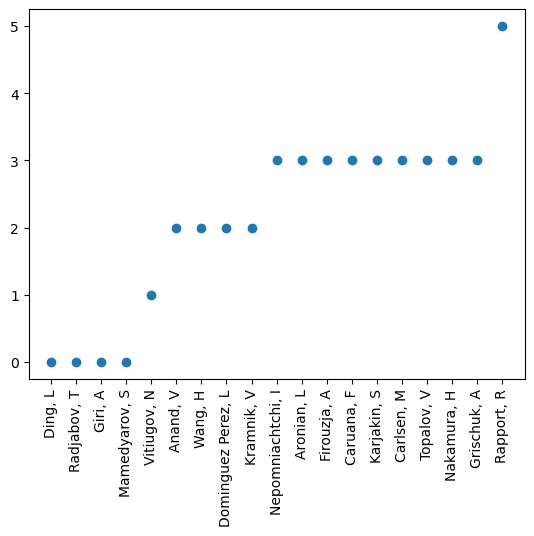

In [45]:
x = []
y = []
for i in dizionario_ordinato.keys():

    x.append(dizionario_ordinato[i])
    y.append(i)

plt.scatter(x=np.array(y), y=np.array(x))

#plt.bar(x=y, height=x)
plt.xticks(rotation=90)

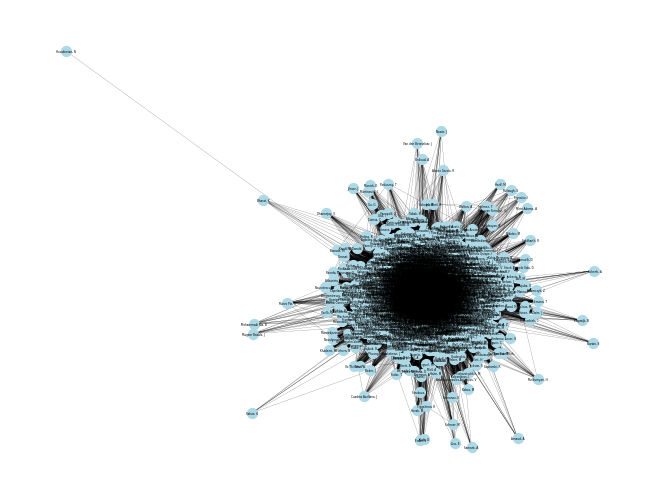

In [15]:
pos = nx.spring_layout(players_graph)
nx.draw(players_graph, pos, with_labels=unique_players, node_color='lightblue', node_size=50, font_size=2, width=0.1)
plt.axis('off')
plt.show()

In [16]:
#partition = best_partition(opening_graph)

'''cmap = cm.get_cmap('viridis', max(partitions.values()) + 1)


plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(players_graph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitions.values()) + 1)
nx.draw_networkx_edges(players_graph, pos, alpha=0.5)
for node, color in partitions.items():
    nx.draw_networkx_nodes(players_graph, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]])'''

"cmap = cm.get_cmap('viridis', max(partitions.values()) + 1)\n\n\nplt.figure(figsize=(12,8))\n# draw the graph\npos = nx.spring_layout(players_graph)\n# color the nodes according to their partition\ncmap = cm.get_cmap('viridis', max(partitions.values()) + 1)\nnx.draw_networkx_edges(players_graph, pos, alpha=0.5)\nfor node, color in partitions.items():\n    nx.draw_networkx_nodes(players_graph, pos, [node], node_size=100,\n                           node_color=[cmap.colors[color]])"

In [17]:
#df = clean_dataframe(path)

In [31]:
df

,White,Black,Result,Date,Opening
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020","C77 Ruy Lopez, Morphy defence"
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020","C67 Ruy Lopez, Berlin defence, open variation"
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020","D38 Queen's Gambit Declined, Ragozin variation"
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020","D35 Queen's Gambit Declined, 3...Nf6"
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020","E04 Catalan, open, 5.Nf3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [32]:
df_senza_top20 = df

In [33]:
top_player_list = list(top_player_list)
top_player_list

['Carlsen, M',
 'Caruana, F',
 'Ding, L',
 'Grischuk, A',
 'Aronian, L',
 'Nepomniachtchi, I',
 'Topalov, V',
 'Vitiugov, N',
 'Karjakin, S',
 'Kramnik, V',
 'Nakamura, H',
 'Dominguez Perez, L',
 'Rapport, R',
 'Anand, V',
 'Wang, H',
 'Radjabov, T',
 'Giri, A',
 'Mamedyarov, S',
 'Vachier Lagrave, M',
 'Firouzja, A']

In [21]:
for i in range(0,20):
    df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == i].index, inplace=True)

In [34]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[0]].index, inplace = True)

In [35]:

df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[1]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[2]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[3]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[4]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[5]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[6]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[7]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[8]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[9]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[10]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[11]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[12]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[13]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[14]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[15]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[16]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[17]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[18]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[19]].index, inplace = True)
#df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[20]].index, inplace = True)

In [36]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[0]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[1]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[2]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[3]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[4]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[5]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[6]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[7]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[8]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[9]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[10]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[11]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[12]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[13]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[14]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[15]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[16]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[17]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[18]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[19]].index, inplace = True)

In [26]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == 'Vachier Lagrave, M'].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == 'Vachier Lagrave, M'].index, inplace = True)

In [37]:
df_senza_top20

,White,Black,Result,Date,Opening
63,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [38]:
df_senza_top20=df_senza_top20.dropna()

In [39]:
df_senza_top20

,White,Black,Result,Date,Opening
84,"Butkiewicz, L","Malicka, M",½-½,"Dec 30, 2020","E36 Nimzo-Indian, classical, Noa variation, 5.a3"
85,"Ustianovich, N","Ochedzan, T",1-0,"Dec 30, 2020",E60 King's Indian defence
86,"Redzisz, M","Sanz Wawer, D",0-1,"Dec 30, 2020","B31 Sicilian, Nimzovich-Rossolimo attack (with..."
87,"Pasti, A","Szpar, M",½-½,"Dec 30, 2020",C11 French defence
88,"Fiedorek, M","Kopylov, M",½-½,"Dec 30, 2020","B42 Sicilian, Kan, 5.Bd3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [40]:
players_graph.remove_nodes_from(df_senza_top20['White'])
players_graph.remove_nodes_from(df_senza_top20['Black'])

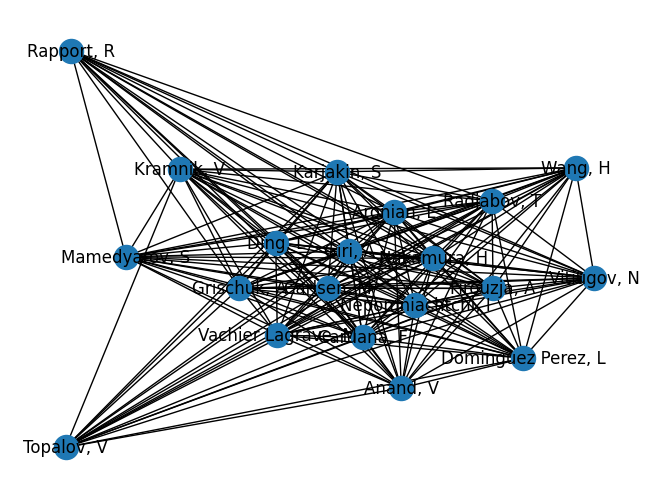

In [41]:
nx.draw(players_graph, with_labels=True)

In [42]:
len(players_graph.nodes)

20

In [44]:
dizionario_delle_comm_associate

{'Dominguez Perez, L': 3,
 'Caruana, F': 3,
 'Vitiugov, N': 0,
 'Firouzja, A': 3,
 'Radjabov, T': 3,
 'Giri, A': 3,
 'Rapport, R': 1,
 'Grischuk, A': 3,
 'Mamedyarov, S': 3,
 'Vachier Lagrave, M': 3,
 'Aronian, L': 3,
 'Karjakin, S': 3,
 'Nakamura, H': 3,
 'Anand, V': 3,
 'Kramnik, V': 0,
 'Ding, L': 3,
 'Nepomniachtchi, I': 3,
 'Carlsen, M': 3,
 'Topalov, V': 3,
 'Wang, H': 0}

In [47]:
players_dict={}

for i in top_player_list:
    players_dict[i]=i

/var/folders/lx/p5pprllx5m17px64p45s4cpr0000gn/T/ipykernel_41927/2966653938.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)
/var/folders/lx/p5pprllx5m17px64p45s4cpr0000gn/T/ipykernel_41927/2966653938.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)


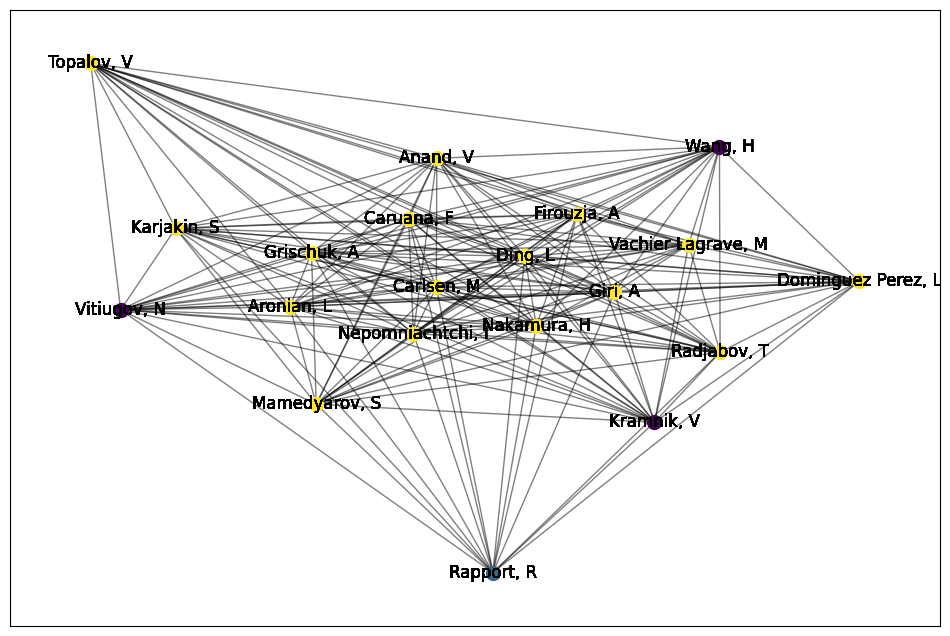

In [48]:

cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)


plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(players_graph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)
nx.draw_networkx_edges(players_graph, pos, alpha=0.5)
for node, color in dizionario_delle_comm_associate.items():
    nx.draw_networkx_nodes(players_graph, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]])
    nx.draw_networkx_labels(players_graph,pos,labels=players_dict)
plt.savefig("/Users/francescoaldoventurelli/Desktop/codici_CN/gm_network.jpg")

In [49]:
len(players_graph.nodes)

20

In [50]:
nx.degree(players_graph,'Carlsen, M')

19

In [52]:
nx.degree(players_graph,'Rapport, R')

15

In [53]:
nx.degree(players_graph,'Caruana, F')

19

In [56]:
def nodes_connected(u, v):
    return u in players_graph.neighbors(v)

ciao = nodes_connected('Carlsen, M', 'Rapport, R')

In [57]:
ciao

True

In [59]:
cluster_dict = nx.clustering(players_graph, nodes=players_graph.nodes)

In [64]:
#### Facciamo l'idea di Luca

### prendiamo 2 giocatori dalla STESSA community (0 e 1) 
### andiamo sul df e prendiamo i codici ECO delle partite che i players hanno giocato fra loro
### plottiamo l'hist (x = partita, y = frequenza)
### confrontare questo histo con un altro hist di un'altra community

In [75]:
path = "./chess_data_2020.csv"
path_to_save = "./nx_saved.jpg"

def clean_dataframe(dataframe): #questa funzione pulisce il df eliminando le colonne inutili e droppa i NaN
  df = pd.read_csv(dataframe)
  new_df = pd.DataFrame(df, columns=['White', 'Black', 'Result', 'Date', 'Opening'])
  new_df.dropna()
  return new_df

new_dataframe = clean_dataframe(path)

In [76]:
new_dataframe

,White,Black,Result,Date,Opening
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020","C77 Ruy Lopez, Morphy defence"
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020","C67 Ruy Lopez, Berlin defence, open variation"
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020","D38 Queen's Gambit Declined, Ragozin variation"
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020","D35 Queen's Gambit Declined, 3...Nf6"
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020","E04 Catalan, open, 5.Nf3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [77]:
### voglio il df con solo gli ECO

def save_first3(dataframe):
    new_name = []
    for i in dataframe["Opening"].values:
        
        new_name.append(str(i)[:3])
    
    dataframe = dataframe.drop("Opening", axis=1)
    dataframe.insert(4, "ECO", new_name, False)
    return dataframe

new_dataframe = save_first3(new_dataframe)

In [78]:
new_dataframe

,White,Black,Result,Date,ECO
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020",E04
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020",D63


In [83]:
new_dataframe[new_dataframe['White'] == 'Carlsen, M']

,White,Black,Result,Date,ECO
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
8,"Carlsen, M","Dubov, D",0-1,"Dec 29, 2020",A15
20,"Carlsen, M","Dubov, D",½-½,"Dec 30, 2020",C48
283,"Carlsen, M","Aronian, L",½-½,"Dec 26, 2020",D38
294,"Carlsen, M","Radjabov, T",½-½,"Dec 26, 2020",D37
...,...,...,...,...,...
18679,"Carlsen, M","Dubov, D",½-½,"Jan 16, 2020",B31
18686,"Carlsen, M","Caruana, F",½-½,"Jan 17, 2020",D37
18700,"Carlsen, M","Vitiugov, N",1-0,"Jan 19, 2020",C84
18714,"Carlsen, M","Kovalev, V",1-0,"Jan 22, 2020",D55


In [127]:
df_solo20w = new_dataframe[new_dataframe['White'].isin(top_player_list)]

In [128]:
df_solo20w

,White,Black,Result,Date,ECO
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...
18729,"Vitiugov, N","Firouzja, A",½-½,"Jan 25, 2020",C78
18732,"Caruana, F","Duda, J",1-0,"Jan 25, 2020",E06
18734,"Anand, V","Kovalev, V",½-½,"Jan 25, 2020",C61
18739,"Giri, A","Van Foreest, J",½-½,"Jan 26, 2020",D10


In [129]:
df_solo20b = new_dataframe[new_dataframe['Black'].isin(top_player_list)]
df_solo20b

,White,Black,Result,Date,ECO
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020",E04
5,"So, W","Vachier Lagrave, M",0-1,"Dec 29, 2020",B90
6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...
18730,"Xiong, J","Giri, A",½-½,"Jan 25, 2020",B30
18735,"So, W","Carlsen, M",½-½,"Jan 26, 2020",C47
18736,"Kovalev, V","Vitiugov, N",½-½,"Jan 26, 2020",C07
18737,"Duda, J","Anand, V",½-½,"Jan 26, 2020",A18


In [130]:
dfsolo20 = pd.concat([df_solo20w, df_solo20b])

In [131]:
dfsolo20 = dfsolo20.reset_index()

In [100]:
dfsolo20

,index,White,Black,Result,Date,ECO
0,0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...,...
2297,18729,"Vitiugov, N","Firouzja, A",½-½,"Jan 25, 2020",C78
2298,18732,"Caruana, F","Duda, J",1-0,"Jan 25, 2020",E06
2299,18734,"Anand, V","Kovalev, V",½-½,"Jan 25, 2020",C61
2300,18739,"Giri, A","Van Foreest, J",½-½,"Jan 26, 2020",D10


In [122]:
dfsolo20[dfsolo20['White'] == 'Carlsen, M']

,index,White,Black,Result,Date,ECO
0,0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
6,8,"Carlsen, M","Dubov, D",0-1,"Dec 29, 2020",A15
14,20,"Carlsen, M","Dubov, D",½-½,"Dec 30, 2020",C48
46,283,"Carlsen, M","Aronian, L",½-½,"Dec 26, 2020",D38
53,294,"Carlsen, M","Radjabov, T",½-½,"Dec 26, 2020",D37
...,...,...,...,...,...,...
2273,18679,"Carlsen, M","Dubov, D",½-½,"Jan 16, 2020",B31
2278,18686,"Carlsen, M","Caruana, F",½-½,"Jan 17, 2020",D37
2284,18700,"Carlsen, M","Vitiugov, N",1-0,"Jan 19, 2020",C84
2290,18714,"Carlsen, M","Kovalev, V",1-0,"Jan 22, 2020",D55


In [123]:
dfsolo20[dfsolo20['Black'] == 'Carlsen, M']

,index,White,Black,Result,Date,ECO
77,329,"Grischuk, A","Carlsen, M",½-½,"Dec 28, 2020",D38
86,342,"Nepomniachtchi, I","Carlsen, M",½-½,"Dec 28, 2020",B33
109,1821,"Giri, A","Carlsen, M",½-½,"Nov 25, 2020",B31
116,1829,"Giri, A","Carlsen, M",0-1,"Nov 25, 2020",C50
119,1832,"Giri, A","Carlsen, M",½-½,"Nov 26, 2020",C53
...,...,...,...,...,...,...
2152,11736,"Nepomniachtchi, I","Carlsen, M",½-½,"Apr 28, 2020",B30
2164,11748,"Ding, L","Carlsen, M",1-0,"Apr 30, 2020",B00
2172,11756,"Ding, L","Carlsen, M",1-0,"Apr 30, 2020",B30
2280,18693,"Anand, V","Carlsen, M",½-½,"Jan 18, 2020",B31


In [125]:
dfsolo20.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2297     True
2298     True
2299     True
2300     True
2301     True
Length: 2302, dtype: bool

In [133]:
dfsolo20 = dfsolo20.drop_duplicates()

In [134]:
dfsolo20

,index,White,Black,Result,Date,ECO
0,0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...,...
2298,18730,"Xiong, J","Giri, A",½-½,"Jan 25, 2020",B30
2299,18735,"So, W","Carlsen, M",½-½,"Jan 26, 2020",C47
2300,18736,"Kovalev, V","Vitiugov, N",½-½,"Jan 26, 2020",C07
2301,18737,"Duda, J","Anand, V",½-½,"Jan 26, 2020",A18


In [136]:
dizionario_delle_comm_associate

{'Dominguez Perez, L': 3,
 'Caruana, F': 3,
 'Vitiugov, N': 0,
 'Firouzja, A': 3,
 'Radjabov, T': 3,
 'Giri, A': 3,
 'Rapport, R': 1,
 'Grischuk, A': 3,
 'Mamedyarov, S': 3,
 'Vachier Lagrave, M': 3,
 'Aronian, L': 3,
 'Karjakin, S': 3,
 'Nakamura, H': 3,
 'Anand, V': 3,
 'Kramnik, V': 0,
 'Ding, L': 3,
 'Nepomniachtchi, I': 3,
 'Carlsen, M': 3,
 'Topalov, V': 3,
 'Wang, H': 0}

In [142]:
com3_players = []
for i in dizionario_delle_comm_associate:
    if dizionario_delle_comm_associate[i] == 3:
        com3_players.append(i)


In [143]:
com3_players

['Dominguez Perez, L',
 'Caruana, F',
 'Firouzja, A',
 'Radjabov, T',
 'Giri, A',
 'Grischuk, A',
 'Mamedyarov, S',
 'Vachier Lagrave, M',
 'Aronian, L',
 'Karjakin, S',
 'Nakamura, H',
 'Anand, V',
 'Ding, L',
 'Nepomniachtchi, I',
 'Carlsen, M',
 'Topalov, V']

In [144]:
len(com3_players)

16

In [153]:
eco_hist_comm3 = [] ## questa è la lista dei top che giocano contro tutti
for i in com3_players:
    for j,k in zip(dfsolo20['White'], dfsolo20['ECO']):
        #print(j)
        if j == i:
            eco_hist_comm3.append(k)
    for j,k in zip(dfsolo20['Black'], dfsolo20['ECO']):
        #print(j)
        if j == i:
            eco_hist_comm3.append(k)


In [154]:
eco_hist_comm3

['C67',
 'A20',
 'A30',
 'C67',
 'D12',
 'D85',
 'C67',
 'B92',
 'C67',
 'B33',
 'B12',
 'C75',
 'C60',
 'B67',
 'B84',
 'B12',
 'C67',
 'C41',
 'B12',
 'C02',
 'B12',
 'C67',
 'B12',
 'B12',
 'B12',
 'B12',
 'A01',
 'C82',
 'C77',
 'D02',
 'E48',
 'B90',
 'E04',
 'C50',
 'E34',
 'E51',
 'E46',
 'E03',
 'E35',
 'E46',
 'D02',
 'C67',
 'A08',
 'A08',
 'C67',
 'A13',
 'E04',
 'A06',
 'C82',
 'C80',
 'C67',
 'B12',
 'C84',
 'D10',
 'E20',
 'B31',
 'B12',
 'C88',
 'C80',
 'B40',
 'C53',
 'E46',
 'E25',
 'E46',
 'A22',
 'C65',
 'D10',
 'E71',
 'E34',
 'E51',
 'E46',
 'E03',
 'E35',
 'E46',
 'E32',
 'C67',
 'C51',
 'B19',
 'E53',
 'D86',
 'C65',
 'B30',
 'B30',
 'B30',
 'B30',
 'B30',
 'B01',
 'C42',
 'C50',
 'C50',
 'C50',
 'C19',
 'C15',
 'B90',
 'C65',
 'B03',
 'C78',
 'D12',
 'E60',
 'D37',
 'D37',
 'D37',
 'D12',
 'A88',
 'B90',
 'A20',
 'E20',
 'D87',
 'C42',
 'B97',
 'C88',
 'B40',
 'B40',
 'D94',
 'C43',
 'A20',
 'B31',
 'D38',
 'E71',
 'E06',
 'D04',
 'A08',
 'E32',
 'B40',
 'D37',


In [155]:
len(eco_hist_comm3)

2195

In [159]:
lista_in_cui_ogni_top_affronta_uno_dilui = []
for i in com3_players:
    for j in com3_players[com3_players.index(i):]:
        for k,t,u in zip(dfsolo20['White'], dfsolo20['Black'], dfsolo20['ECO']):
        #print(j)
            if (k == i and t == j) or (k == j and t == i):
                lista_in_cui_ogni_top_affronta_uno_dilui.append(u)

In [160]:
lista_in_cui_ogni_top_affronta_uno_dilui

['B12',
 'E34',
 'C67',
 'E51',
 'B12',
 'E46',
 'B12',
 'E03',
 'B12',
 'E35',
 'B12',
 'E46',
 'C82',
 'B67',
 'B12',
 'B92',
 'E48',
 'E04',
 'C67',
 'B90',
 'C50',
 'C67',
 'C77',
 'C75',
 'C67',
 'A01',
 'B84',
 'C02',
 'D02',
 'C60',
 'C41',
 'D04',
 'B12',
 'A08',
 'B12',
 'D11',
 'D12',
 'D11',
 'E60',
 'E71',
 'D02',
 'E71',
 'C65',
 'C47',
 'A20',
 'B90',
 'A80',
 'A20',
 'D12',
 'B40',
 'E32',
 'C78',
 'B40',
 'B40',
 'D11',
 'D10',
 'D12',
 'D31',
 'A88',
 'A00',
 'C78',
 'B97',
 'E20',
 'B40',
 'C78',
 'C50',
 'D10',
 'C50',
 'A04',
 'C50',
 'A04',
 'D37',
 'D11',
 'D37',
 'D11',
 'D37',
 'D38',
 'E46',
 'A07',
 'A07',
 'B90',
 'D73',
 'C65',
 'A07',
 'D17',
 'C88',
 'A22',
 'C78',
 'C19',
 'C78',
 'C15',
 'C84',
 'D87',
 'C47',
 'C67',
 'E32',
 'B31',
 'D37',
 'C53',
 'B51',
 'E46',
 'E10',
 'E25',
 'A22',
 'C65',
 'A45',
 'B30',
 'C42',
 'B30',
 'C42',
 'B30',
 'A22',
 'B30',
 'D37',
 'B30',
 'B03',
 'D37',
 'C78',
 'C46',
 'D37',
 'C46',
 'B67',
 'E51',
 'B12',
 'D85',


In [161]:
len(lista_in_cui_ogni_top_affronta_uno_dilui)

732

In [164]:
set(eco_hist_comm3)

{'A00',
 'A01',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A11',
 'A13',
 'A14',
 'A15',
 'A18',
 'A20',
 'A22',
 'A25',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A40',
 'A41',
 'A45',
 'A46',
 'A48',
 'A49',
 'A53',
 'A57',
 'A80',
 'A81',
 'A88',
 'A90',
 'B00',
 'B01',
 'B03',
 'B04',
 'B06',
 'B08',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B28',
 'B30',
 'B31',
 'B32',
 'B33',
 'B35',
 'B36',
 'B40',
 'B41',
 'B42',
 'B46',
 'B47',
 'B48',
 'B50',
 'B51',
 'B52',
 'B53',
 'B54',
 'B56',
 'B60',
 'B62',
 'B66',
 'B67',
 'B68',
 'B69',
 'B75',
 'B80',
 'B81',
 'B82',
 'B84',
 'B87',
 'B89',
 'B90',
 'B91',
 'B92',
 'B93',
 'B95',
 'B96',
 'B97',
 'C00',
 'C02',
 'C10',
 'C11',
 'C15',
 'C19',
 'C20',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C34',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C46',
 'C47',
 'C48',
 'C49',
 'C50',
 'C51',
 'C53',
 'C55',
 'C58',
 'C60',


In [187]:
lista_comm3 = list(set(eco_hist_comm3))

In [188]:
lista_comm3

['D39',
 'E63',
 'C80',
 'C28',
 'E20',
 'B62',
 'E26',
 'D55',
 'A31',
 'D14',
 'E48',
 'D00',
 'B32',
 'D19',
 'D16',
 'B06',
 'A29',
 'D94',
 'C84',
 'C42',
 'C76',
 'B50',
 'E11',
 'E32',
 'D04',
 'A41',
 'B47',
 'D86',
 'C61',
 'E03',
 'C02',
 'D93',
 'E16',
 'E04',
 'B80',
 'C75',
 'A07',
 'A90',
 'E34',
 'B13',
 'D25',
 'B95',
 'C45',
 'C20',
 'C15',
 'B84',
 'C34',
 'B66',
 'B28',
 'D10',
 'E51',
 'E47',
 'D15',
 'A00',
 'B51',
 'D45',
 'E62',
 'B41',
 'E39',
 'C65',
 'E97',
 'B92',
 'D43',
 'D20',
 'A13',
 'E53',
 'C46',
 'A57',
 'C50',
 'C51',
 'nan',
 'C48',
 'A27',
 'C82',
 'E21',
 'B14',
 'D44',
 'C53',
 'A11',
 'D13',
 'A22',
 'D05',
 'D02',
 'E10',
 'D41',
 'B24',
 'E60',
 'D31',
 'C63',
 'E73',
 'E90',
 'A01',
 'B90',
 'B87',
 'B68',
 'A45',
 'E68',
 'B10',
 'E54',
 'D37',
 'A03',
 'B12',
 'A06',
 'A46',
 'A15',
 'D38',
 'E14',
 'B00',
 'D36',
 'D97',
 'D17',
 'A14',
 'C78',
 'C11',
 'C55',
 'B54',
 'B40',
 'C92',
 'C27',
 'C24',
 'B48',
 'B30',
 'B08',
 'A28',
 'D77',


In [189]:
lista_comm3.sort()

In [190]:
lista_comm3

['A00',
 'A01',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A11',
 'A13',
 'A14',
 'A15',
 'A18',
 'A20',
 'A22',
 'A25',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A40',
 'A41',
 'A45',
 'A46',
 'A48',
 'A49',
 'A53',
 'A57',
 'A80',
 'A81',
 'A88',
 'A90',
 'B00',
 'B01',
 'B03',
 'B04',
 'B06',
 'B08',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B28',
 'B30',
 'B31',
 'B32',
 'B33',
 'B35',
 'B36',
 'B40',
 'B41',
 'B42',
 'B46',
 'B47',
 'B48',
 'B50',
 'B51',
 'B52',
 'B53',
 'B54',
 'B56',
 'B60',
 'B62',
 'B66',
 'B67',
 'B68',
 'B69',
 'B75',
 'B80',
 'B81',
 'B82',
 'B84',
 'B87',
 'B89',
 'B90',
 'B91',
 'B92',
 'B93',
 'B95',
 'B96',
 'B97',
 'C00',
 'C02',
 'C10',
 'C11',
 'C15',
 'C19',
 'C20',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C34',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C46',
 'C47',
 'C48',
 'C49',
 'C50',
 'C51',
 'C53',
 'C55',
 'C58',
 'C60',


In [191]:
lista_comm3 = lista_comm3[:-1]

In [192]:
lista_comm3

['A00',
 'A01',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A11',
 'A13',
 'A14',
 'A15',
 'A18',
 'A20',
 'A22',
 'A25',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A40',
 'A41',
 'A45',
 'A46',
 'A48',
 'A49',
 'A53',
 'A57',
 'A80',
 'A81',
 'A88',
 'A90',
 'B00',
 'B01',
 'B03',
 'B04',
 'B06',
 'B08',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B28',
 'B30',
 'B31',
 'B32',
 'B33',
 'B35',
 'B36',
 'B40',
 'B41',
 'B42',
 'B46',
 'B47',
 'B48',
 'B50',
 'B51',
 'B52',
 'B53',
 'B54',
 'B56',
 'B60',
 'B62',
 'B66',
 'B67',
 'B68',
 'B69',
 'B75',
 'B80',
 'B81',
 'B82',
 'B84',
 'B87',
 'B89',
 'B90',
 'B91',
 'B92',
 'B93',
 'B95',
 'B96',
 'B97',
 'C00',
 'C02',
 'C10',
 'C11',
 'C15',
 'C19',
 'C20',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C34',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C46',
 'C47',
 'C48',
 'C49',
 'C50',
 'C51',
 'C53',
 'C55',
 'C58',
 'C60',


In [202]:
eco_dizionario = {}
for i in lista_comm3:
    eco_dizionario[i] =0
    

In [203]:
eco_hist_comm3.sort()

In [204]:
eco_hist_comm3 = eco_hist_comm3[:-1]

In [205]:
for j in eco_hist_comm3:
    eco_dizionario[j] += 1

In [206]:
eco_dizionario

{'A00': 4,
 'A01': 18,
 'A03': 2,
 'A04': 11,
 'A05': 13,
 'A06': 20,
 'A07': 30,
 'A08': 14,
 'A09': 1,
 'A11': 4,
 'A13': 11,
 'A14': 5,
 'A15': 18,
 'A18': 4,
 'A20': 44,
 'A22': 24,
 'A25': 1,
 'A27': 1,
 'A28': 17,
 'A29': 18,
 'A30': 4,
 'A31': 1,
 'A33': 9,
 'A34': 6,
 'A35': 11,
 'A36': 1,
 'A37': 2,
 'A40': 3,
 'A41': 4,
 'A45': 20,
 'A46': 4,
 'A48': 17,
 'A49': 2,
 'A53': 4,
 'A57': 1,
 'A80': 4,
 'A81': 8,
 'A88': 6,
 'A90': 2,
 'B00': 10,
 'B01': 5,
 'B03': 6,
 'B04': 2,
 'B06': 8,
 'B08': 7,
 'B10': 8,
 'B11': 4,
 'B12': 47,
 'B13': 11,
 'B14': 4,
 'B15': 1,
 'B18': 1,
 'B19': 8,
 'B20': 2,
 'B21': 2,
 'B22': 6,
 'B23': 2,
 'B24': 2,
 'B28': 1,
 'B30': 45,
 'B31': 13,
 'B32': 5,
 'B33': 14,
 'B35': 7,
 'B36': 1,
 'B40': 12,
 'B41': 1,
 'B42': 4,
 'B46': 2,
 'B47': 4,
 'B48': 1,
 'B50': 12,
 'B51': 40,
 'B52': 8,
 'B53': 9,
 'B54': 11,
 'B56': 2,
 'B60': 2,
 'B62': 2,
 'B66': 1,
 'B67': 7,
 'B68': 2,
 'B69': 3,
 'B75': 2,
 'B80': 2,
 'B81': 2,
 'B82': 2,
 'B84': 2,
 'B87':

In [207]:
for j in lista_in_cui_ogni_top_affronta_uno_dilui:
    eco_dizionario[j] -= 1

In [208]:
eco_dizionario

{'A00': 3,
 'A01': 12,
 'A03': 1,
 'A04': 8,
 'A05': 9,
 'A06': 14,
 'A07': 20,
 'A08': 10,
 'A09': 1,
 'A11': 3,
 'A13': 7,
 'A14': 5,
 'A15': 13,
 'A18': 3,
 'A20': 27,
 'A22': 14,
 'A25': 1,
 'A27': 1,
 'A28': 11,
 'A29': 13,
 'A30': 4,
 'A31': 1,
 'A33': 6,
 'A34': 3,
 'A35': 7,
 'A36': 1,
 'A37': 2,
 'A40': 2,
 'A41': 2,
 'A45': 12,
 'A46': 3,
 'A48': 10,
 'A49': 2,
 'A53': 4,
 'A57': 1,
 'A80': 2,
 'A81': 5,
 'A88': 3,
 'A90': 1,
 'B00': 6,
 'B01': 4,
 'B03': 3,
 'B04': 2,
 'B06': 5,
 'B08': 4,
 'B10': 6,
 'B11': 3,
 'B12': 30,
 'B13': 7,
 'B14': 3,
 'B15': 1,
 'B18': 1,
 'B19': 5,
 'B20': 2,
 'B21': 1,
 'B22': 4,
 'B23': 1,
 'B24': 1,
 'B28': 1,
 'B30': 26,
 'B31': 9,
 'B32': 5,
 'B33': 11,
 'B35': 6,
 'B36': 1,
 'B40': 8,
 'B41': 1,
 'B42': 3,
 'B46': 2,
 'B47': 3,
 'B48': 1,
 'B50': 7,
 'B51': 27,
 'B52': 6,
 'B53': 8,
 'B54': 6,
 'B56': 2,
 'B60': 2,
 'B62': 1,
 'B66': 1,
 'B67': 5,
 'B68': 1,
 'B69': 2,
 'B75': 1,
 'B80': 1,
 'B81': 1,
 'B82': 1,
 'B84': 1,
 'B87': 1,
 'B89'

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

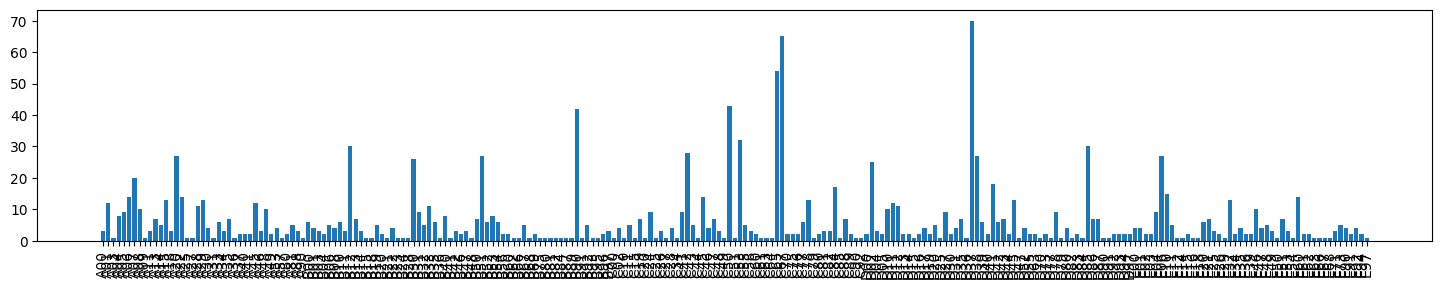

In [212]:
figure = plt.figure(figsize=(18,3))
plt.bar(eco_dizionario.keys(), eco_dizionario.values())
plt.xticks(rotation=90)

In [217]:
treshold = 20   ### imposto una soglia che tolgo cos' da avere un histo più piccolino
altro_diz_con_trsheold = {}
for i in eco_dizionario:
    if eco_dizionario[i] >= treshold:
        altro_diz_con_trsheold[i] = eco_dizionario[i]


In [219]:
norma = sum(altro_diz_con_trsheold.values())

In [220]:
norma

573

In [226]:
valori = np.array(list(altro_diz_con_trsheold.values()))

In [228]:
valori/norma

array([0.03490401, 0.04712042, 0.05235602, 0.04537522, 0.04712042,
       0.07329843, 0.04886562, 0.07504363, 0.05584642, 0.09424084,
       0.11343805, 0.04363002, 0.12216405, 0.04712042, 0.05235602,
       0.04712042])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'A07'),
  Text(1, 0, 'A20'),
  Text(2, 0, 'B12'),
  Text(3, 0, 'B30'),
  Text(4, 0, 'B51'),
  Text(5, 0, 'B90'),
  Text(6, 0, 'C42'),
  Text(7, 0, 'C50'),
  Text(8, 0, 'C53'),
  Text(9, 0, 'C65'),
  Text(10, 0, 'C67'),
  Text(11, 0, 'D02'),
  Text(12, 0, 'D37'),
  Text(13, 0, 'D38'),
  Text(14, 0, 'D85'),
  Text(15, 0, 'E06')])

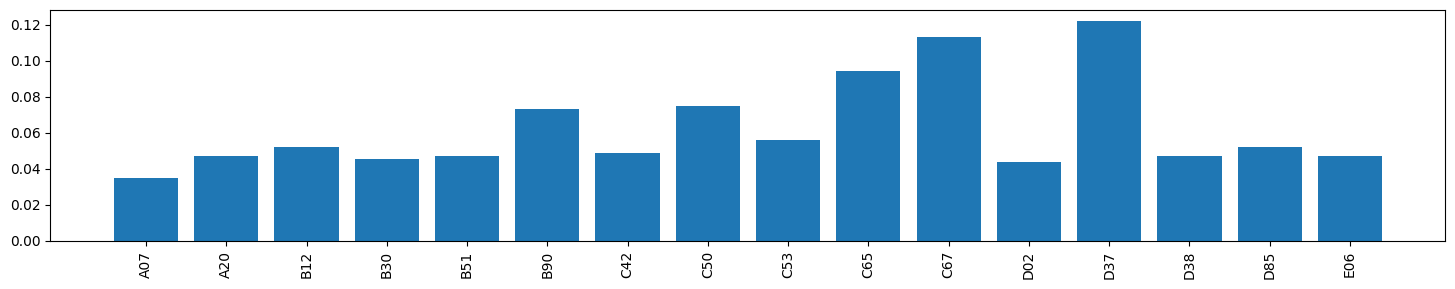

In [229]:
figure = plt.figure(figsize=(18,3))
plt.bar(altro_diz_con_trsheold.keys(), valori/norma)
plt.xticks(rotation=90)

In [239]:
dfsolo20.dropna()

,index,White,Black,Result,Date,ECO
0,0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...,...
2298,18730,"Xiong, J","Giri, A",½-½,"Jan 25, 2020",B30
2299,18735,"So, W","Carlsen, M",½-½,"Jan 26, 2020",C47
2300,18736,"Kovalev, V","Vitiugov, N",½-½,"Jan 26, 2020",C07
2301,18737,"Duda, J","Anand, V",½-½,"Jan 26, 2020",A18


In [258]:
def histogramma_community(dataframe, community_lista, treshold=20):
    eco_histogram = [] ## questa è la lista dei top che giocano contro tutti
    dataframe.dropna()
    for i in community_lista:
        for j,k in zip(dataframe['White'], dataframe['ECO']):
            #print(j)
            if j == i:
                eco_histogram.append(k)
        for j,k in zip(dataframe['Black'], dataframe['ECO']):
            #print(j)
            if j == i:
                eco_histogram.append(k)
    lista_in_cui_ogni_top_affronta_uno_dilui = []
    for i in community_lista:
        for j in community_lista[community_lista.index(i):]:
            for k,t,u in zip(dataframe['White'], dataframe['Black'], dataframe['ECO']):
            #print(j)
                if (k == i and t == j) or (k == j and t == i):
                    lista_in_cui_ogni_top_affronta_uno_dilui.append(u)
    eco_histogram_set = list(set(eco_histogram))
    eco_histogram_set.sort()
    for i in range(len(eco_histogram_set)):
        if eco_histogram_set[i]=='nan':
            eco_histogram_set.remove(eco_histogram_set[i])
    for i in range(len(eco_histogram)):
        if eco_histogram[i]=='nan':
            eco_histogram.remove(eco_histogram[i])
    eco_dizionario = {}
    for i in eco_histogram_set:
        eco_dizionario[i] =0
    for j in eco_histogram:
        eco_dizionario[j] += 1
    for j in lista_in_cui_ogni_top_affronta_uno_dilui:
        eco_dizionario[j] -= 1
      ### imposto una soglia che tolgo cos' da avere un histo più piccolino
    altro_diz_con_trsheold = {}
    for i in eco_dizionario:
        if eco_dizionario[i] >= treshold:
            altro_diz_con_trsheold[i] = eco_dizionario[i]
    valori = np.array(list(altro_diz_con_trsheold.values()))
    norma = sum(altro_diz_con_trsheold.values())
    figure = plt.figure(figsize=(18,3))
    plt.bar(altro_diz_con_trsheold.keys(), valori/norma)
    plt.xticks(rotation=90)
    return figure


In [259]:
ciao = histogramma_community(dfsolo20, com3_players)
plt.show()

IndexError: list index out of range

In [248]:
def estrai_df(dataframe, community_lista):
    eco_histogram = [] ## questa è la lista dei top che giocano contro tutti
    dataframe.dropna()
    for i in community_lista:
        for j,k in zip(dataframe['White'], dataframe['ECO']):
            #print(j)
            if j == i:
                eco_histogram.append(k)
        for j,k in zip(dataframe['Black'], dataframe['ECO']):
            #print(j)
            if j == i:
                eco_histogram.append(k)
    lista_in_cui_ogni_top_affronta_uno_dilui = []
    for i in community_lista:
        for j in community_lista[community_lista.index(i):]:
            for k,t,u in zip(dataframe['White'], dataframe['Black'], dataframe['ECO']):
            #print(j)
                if (k == i and t == j) or (k == j and t == i):
                    lista_in_cui_ogni_top_affronta_uno_dilui.append(u)
    eco_histogram_set = list(set(eco_histogram))
    eco_histogram_set.sort()
    return eco_histogram, eco_histogram_set, lista_in_cui_ogni_top_affronta_uno_dilui

In [249]:
isto, istoset, listalui = estrai_df(dfsolo20, com3_players)


In [252]:
isto.sort()
isto[-1]

'nan'

In [253]:
def seconda_part(eco_histogram, eco_histogram_set, lista_in_cui_ogni_top_affronta_uno_dilui, treshold=20):
    for i in range(len(eco_histogram_set)):
        if eco_histogram_set[i]=='nan':
            eco_histogram_set.remove(eco_histogram_set[i])
    for i in range(len(eco_histogram)):
        if eco_histogram[i]=='nan':
            eco_histogram.remove(eco_histogram[i])
    eco_dizionario = {}
    for i in eco_histogram_set:
        eco_dizionario[i] =0
    for j in eco_histogram:
        eco_dizionario[j] += 1
    for j in lista_in_cui_ogni_top_affronta_uno_dilui:
        eco_dizionario[j] -= 1
      ### imposto una soglia che tolgo cos' da avere un histo più piccolino
    altro_diz_con_trsheold = {}
    for i in eco_dizionario:
        if eco_dizionario[i] >= treshold:
            altro_diz_con_trsheold[i] = eco_dizionario[i]
    valori = np.array(list(altro_diz_con_trsheold.values()))
    norma = sum(altro_diz_con_trsheold.values())
    figure = plt.figure(figsize=(18,3))
    plt.bar(altro_diz_con_trsheold.keys(), valori/norma)
    plt.xticks(rotation=90)
    return figure

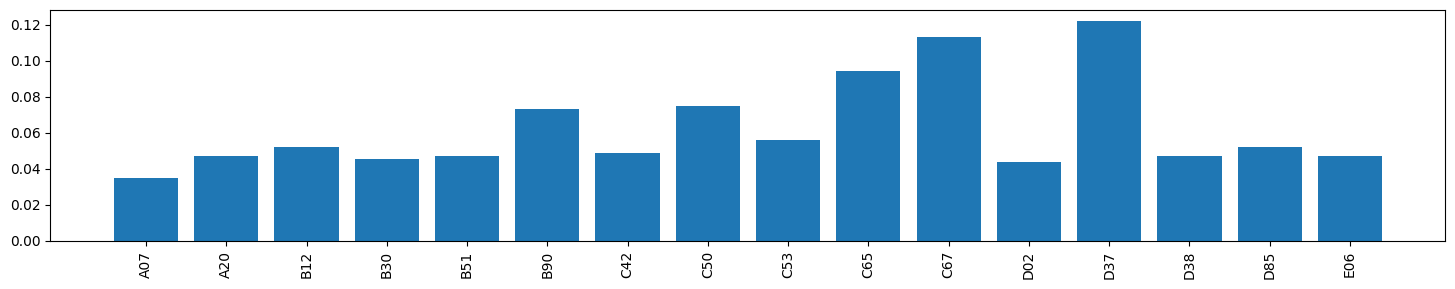

In [254]:
ciao2 = seconda_part(isto, istoset, listalui)